In [67]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import math
import matplotlib.pyplot as plt

In [68]:
df = pd.read_csv('./compiled.csv')
# df = df.dropna()
#df = df.drop(columns=['Unnamed: 0']).dropna()
df.columns

Index(['Year', 'Player', 'Pos', 'Age', 'Tm', 'G', 'MP', 'PER', 'TS%', '3PAr',
       'FTr', 'ORB%', 'DRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS',
       'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', '3P%', '2P%', 'FT%', 'TmNetRtg'],
      dtype='object')

### Calculate Change in TmNetRtg and WS

In [69]:
next_rtg = []
for index, row in df.iterrows():
    current_team = row['Tm']
    next_year = row['Year'] + 1
    
    try:
        rtg = df.loc[(df['Tm'] == current_team) & (df['Year'] == next_year)].iloc[0]['TmNetRtg']
        next_rtg.append(rtg)
    except:
        next_rtg.append(math.nan)

In [70]:
df['Next Rtg'] = next_rtg
df = df.dropna()
df.head()

,Year,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,...,DWS,WS,WS/48,OBPM,DBPM,3P%,2P%,FT%,TmNetRtg,Next Rtg
0,1997,Greg Anderson,C,32.0,SAS,82.0,1659.0,11.4,0.531,0.004,...,1.5,2.2,0.064,-3.1,1.4,0.000,0.498,0.667,-8.8,4.4
1,1997,Vinny Del,SG,30.0,SAS,72.0,2243.0,14.4,0.529,0.179,...,-0.1,3.1,0.066,0.6,-2.3,0.314,0.501,0.868,-8.8,4.4
2,1997,Carl Herrera,PF,30.0,SAS,75.0,1837.0,10.6,0.463,0.010,...,0.9,0.1,0.002,-4.0,-0.5,0.333,0.434,0.686,-8.8,4.4
3,1997,Avery Johnson,PG,31.0,SAS,76.0,2472.0,15.0,0.517,0.038,...,0.0,3.4,0.066,-0.2,-3.0,0.231,0.487,0.690,-8.8,4.4
4,1997,Vernon Maxwell,SG,31.0,SAS,72.0,2068.0,11.8,0.471,0.411,...,0.3,0.0,-0.001,-0.6,-2.7,0.309,0.421,0.744,-8.8,4.4


In [71]:
change_rtg = 100*((df['Next Rtg'] - df['TmNetRtg'])/df['TmNetRtg'])
#assert(change_rtg[0] == df.iloc[0]['Next Rtg'] - df.iloc[0]['TmNetRtg'])

In [72]:
next_ws = []
for index, row in df.iterrows():
    current_player = row['Player']
    next_year = row['Year'] + 1
    
    try:
        ws = df.loc[(df['Player'] == current_player) & (df['Year'] == next_year)].iloc[0]['WS']
        next_ws.append(ws)
    except:
        next_ws.append(math.nan)

In [73]:
df['Next WS'] = next_ws
df = df.dropna()
df.tail()

,Year,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,...,WS,WS/48,OBPM,DBPM,3P%,2P%,FT%,TmNetRtg,Next Rtg,Next WS
1367,2019,JaVale McGee,C,31.0,LAL,75.0,1671.0,21.8,0.634,0.019,...,5.9,0.171,0.3,1.2,0.083,0.634,0.632,-1.6,5.6,4.7
1372,2019,Paul Millsap,PF,33.0,DEN,70.0,1895.0,17.9,0.570,0.239,...,6.1,0.155,0.7,1.0,0.365,0.522,0.727,4.0,2.2,3.5
1373,2019,J.J. Redick,SG,34.0,PHI,76.0,2379.0,15.1,0.602,0.589,...,5.9,0.118,2.2,-2.0,0.397,0.502,0.894,2.6,2.3,4.1
1374,2019,Ish Smith,PG,30.0,DET,56.0,1251.0,11.8,0.485,0.276,...,1.7,0.064,-1.6,-0.3,0.326,0.455,0.758,-0.3,-3.5,1.9
1376,2019,Russell Westbrook,PG,30.0,OKC,73.0,2630.0,21.1,0.501,0.279,...,6.8,0.124,2.8,2.4,0.290,0.481,0.656,3.4,2.1,4.2


### Create Veteran Value Metric

In [74]:
change_ws = 100*((df['Next WS'] - df['WS'])/df['WS'])
#assert(change_ws[0] == (df.iloc[0]['Next WS'] - df.iloc[0]['WS']))
#assert(len(change_ws) == len(change_usg))

In [75]:
change_ws

1       19.354839
3       97.058824
7       -8.510638
8      -16.049383
9      -57.303371
          ...    
1367   -20.338983
1372   -42.622951
1373   -30.508475
1374    11.764706
1376   -38.235294
Length: 697, dtype: float64

In [76]:
z = zip(change_ws, change_rtg)
targets = []
target_class = []
#tgt represents decline
for t in z:
    d_ws = t[0]
    d_rtg = t[1]
    
    RTG_UP = d_rtg > 0
    RTG_DOWN = d_rtg < 0
    WS_UP = d_ws >= 0
    
    
    if RTG_UP:
        vv = d_rtg * d_ws
    else:
        if WS_UP:
            vv = -1*d_rtg 
        else:
            vv = d_rtg / d_ws
        
        
    
    targets.append(vv)
    target_class.append(0 if vv >= 0 else 1)
    
df['Veteran Value'] = targets
df['VV Class'] = target_class

In [77]:
np.mean(targets)

inf

In [78]:
np.percentile(targets, 10)

-4211.265328745294

In [79]:
df.head()

,Year,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,...,OBPM,DBPM,3P%,2P%,FT%,TmNetRtg,Next Rtg,Next WS,Veteran Value,VV Class
1,1997,Vinny Del,SG,30.0,SAS,72.0,2243.0,14.4,0.529,0.179,...,0.6,-2.3,0.314,0.501,0.868,-8.8,4.4,3.7,150.000000,0
3,1997,Avery Johnson,PG,31.0,SAS,76.0,2472.0,15.0,0.517,0.038,...,-0.2,-3.0,0.231,0.487,0.690,-8.8,4.4,6.7,150.000000,0
7,1997,Charles Barkley,PF,33.0,HOU,53.0,2009.0,23.0,0.581,0.296,...,4.4,2.8,0.283,0.569,0.694,4.7,-0.9,8.6,17.625000,0
8,1997,Clyde Drexler,SG,34.0,HOU,62.0,2271.0,19.9,0.548,0.373,...,3.9,1.7,0.355,0.493,0.750,4.7,-0.9,6.8,9.346154,0
9,1997,Mario Elie,SF,33.0,HOU,78.0,2687.0,14.3,0.662,0.489,...,2.4,0.1,0.420,0.572,0.896,4.7,-0.9,3.8,2.617647,0


### Relationship between Decline and Features¶

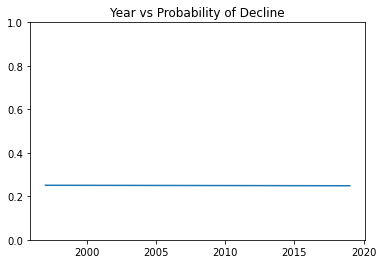

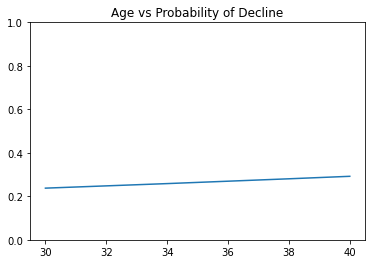

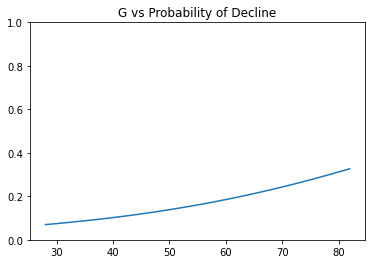

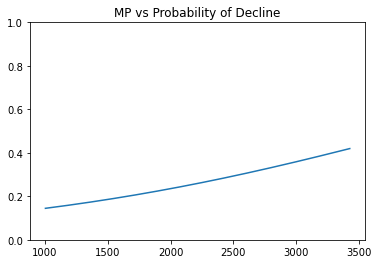

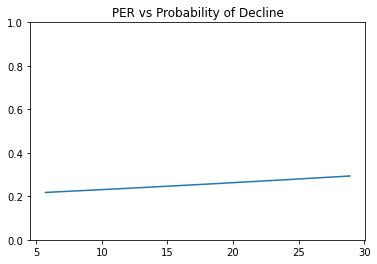

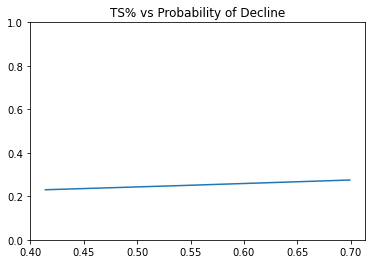

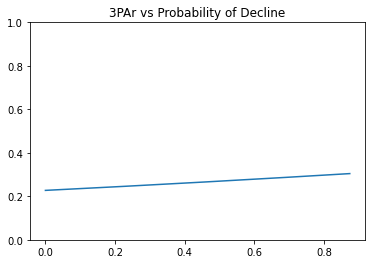

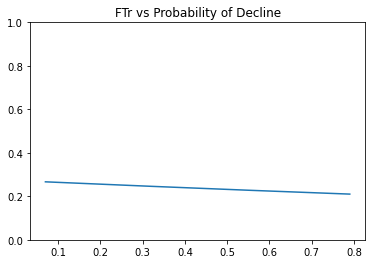

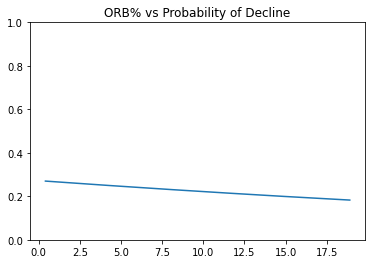

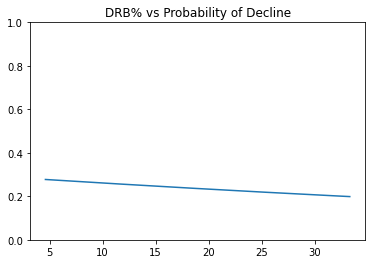

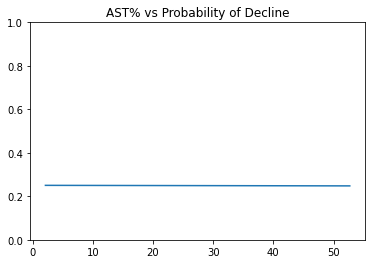

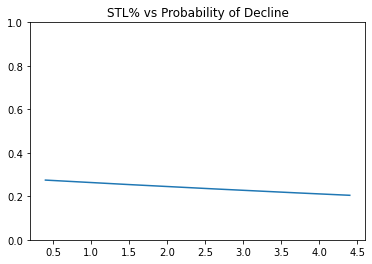

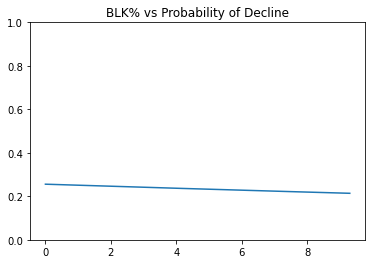

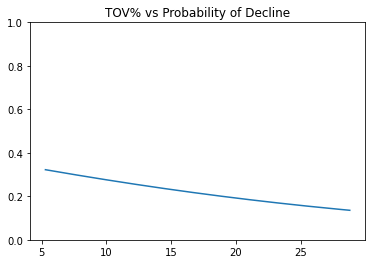

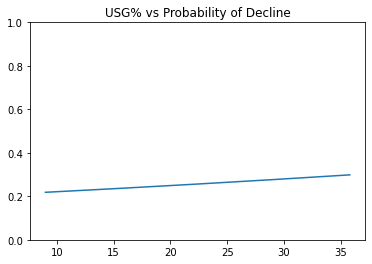

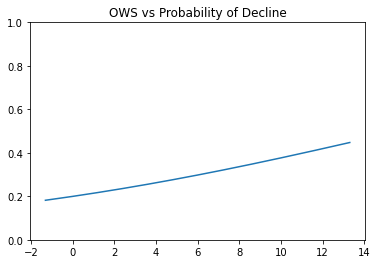

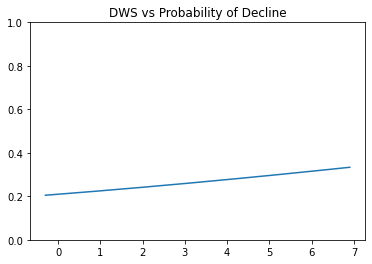

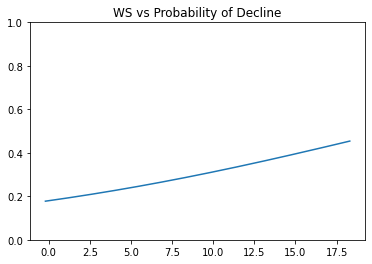

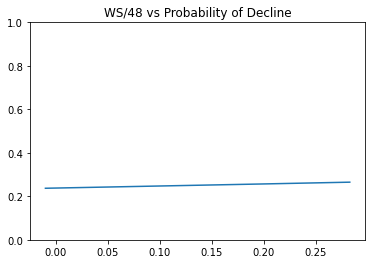

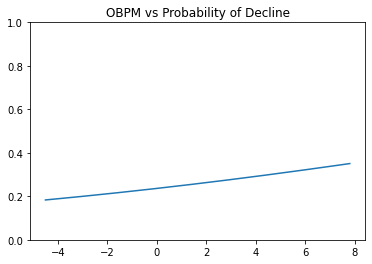

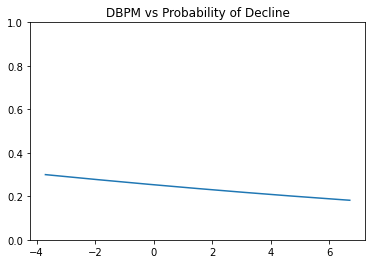

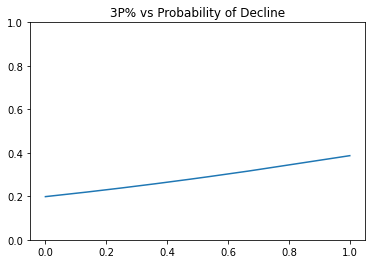

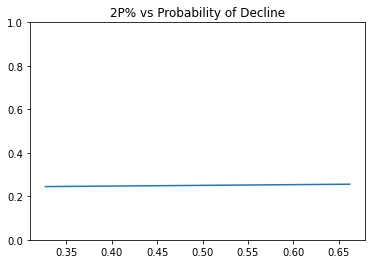

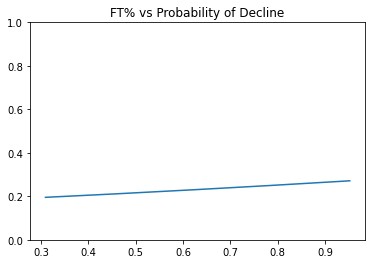

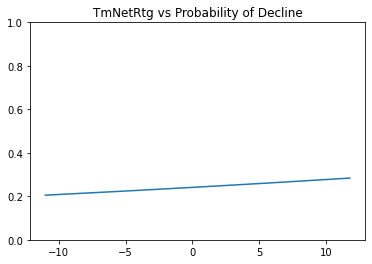

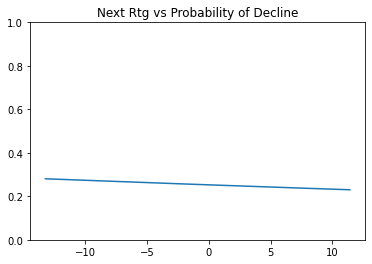

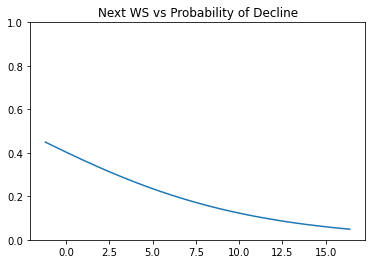

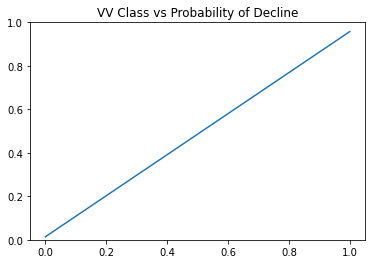

In [81]:
label = df['VV Class']
for c in df.columns:
    try:
        feature = list(df[c])

        z = list(zip(feature, label))
        z = sorted(z, key=lambda t: t[0])

        X = [t[0] for t in z]
        X = np.array(X).reshape(-1, 1)
        y = [t[1] for t in z]

        clf = LogisticRegression(random_state=0).fit(X, y)
        yg = clf.predict_proba(X)[:, 1]

        plt.title('%s vs Probability of Decline'%(c))
        plt.plot(X, yg)
        ax = plt.gca()
        ax.set_ylim([0, 1])
        plt.show()
    except:
        continue

### Visualizing Distribution of Decline

ValueError: supplied range of [-150000.0, inf] is not finite

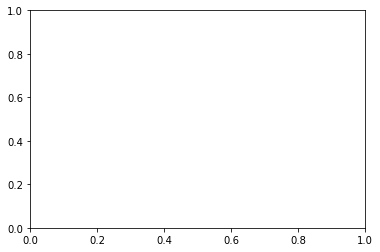

In [83]:
ax = plt.hist(df['Veteran Value'], bins=40)
ax = plt.xlabel('Veteran Value', fontsize=16)
ax = plt.ylabel('Individual Player Seasons', fontsize=16)
ax = plt.xticks(fontsize=12)
ax = plt.yticks(fontsize=12)

In [16]:
def outlier_aware_hist(data, lower=None, upper=None):
    if not lower or lower < data.min():
        lower = data.min()
        lower_outliers = False
    else:
        lower_outliers = True

    if not upper or upper > data.max():
        upper = data.max()
        upper_outliers = False
    else:
        upper_outliers = True

    n, bins, patches = plt.hist(data, range=(lower, upper), bins='auto')

    if lower_outliers:
        n_lower_outliers = (data < lower).sum()
        patches[0].set_height(patches[0].get_height() + n_lower_outliers)
        patches[0].set_facecolor('c')
        patches[0].set_label('Lower outliers: ({:.2f}, {:.2f})'.format(data.min(), lower))

    if upper_outliers:
        n_upper_outliers = (data > upper).sum()
        patches[-1].set_height(patches[-1].get_height() + n_upper_outliers)
        patches[-1].set_facecolor('m')
        patches[-1].set_label('Upper outliers: ({:.2f}, {:.2f})'.format(upper, data.max()))

    if lower_outliers or upper_outliers:
        plt.legend()
    plt.title('Range of Decline')
    plt.xlabel('Decline',fontsize=12)
    plt.ylabel('Frequency',fontsize=12)

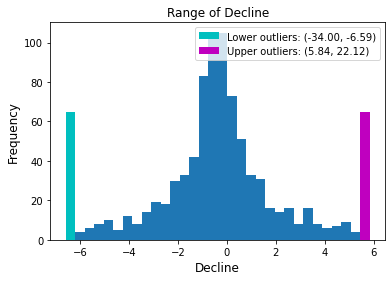

In [17]:
def mad(data):
    median = np.median(data)
    diff = np.abs(data - median)
    mad = np.median(diff)
    return mad

def calculate_bounds(data, z_thresh=3.5):
    MAD = mad(data)
    median = np.median(data)
    const = z_thresh * MAD / 0.6745
    return (median - const, median + const)

outlier_aware_hist(df['Decline'], *calculate_bounds(df['Decline']))

The distribution of player decline appears normal, with most of the change centered around 0, which makes sense based on how we calculate decline. However the outliers extend pretty far out to ranges from -6 to -30 and improvement having a range from 6 to 22. While the objective is to find the largest veteran declines, we also want to make sure our formula has a proper distribution, there appears to be too many players in the lower and upper outlier range as indicated by the first and last bin. 

### Evaluate How Age and Playing Time Affects Decline

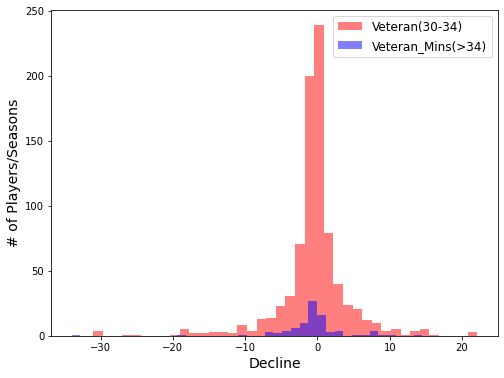

In [18]:
# Separate players into Veteran(30-34) and Veteran_Mins(>=35). 
#Veteran_Mins are old players who typically sign for the minimum
veteran = df.loc[(df['Age']>=30) & (df['Age']<35), 'Decline']
veteran_mins = df.loc[df['Age']>=35, 'Decline']
plot_data = [veteran, veteran_mins]
labels = ['Veteran(30-34)','Veteran_Mins(>34)']
colors = ['red','blue']
# Histogram
ax = plt.figure(figsize=(8,6))
for group, label, color in zip(plot_data, labels, colors):
    _ = plt.hist(group, bins=40, alpha=0.5, label=label, color=color)
plt.xlabel('Decline', fontsize=14)
plt.ylabel('# of Players/Seasons', fontsize=14)
plt.legend(fontsize=12)

In [19]:
def ztest(d1, d2, label):
    from statsmodels.stats.weightstats import CompareMeans
    test_data = CompareMeans.from_data(d1, d2)
    z, p = CompareMeans.ztest_ind(test_data)
    print('For {}, z = {}, p = {}'.format(label,z,p))

In [20]:
ztest(veteran, veteran_mins, 'Veterans vs Old Veterans')
print('The average improvement for veterans were', veteran.mean())
print('The average improvement for old veterans were', veteran_mins.mean())

For Veterans vs Old Veterans, z = 0.35155217273252165, p = 0.7251741388052155
The average improvement for veterans were -0.5158951038962185
The average improvement for old veterans were -0.7161883614979866


There appears to be a much larger distribution of decline amongst veteran players compared to older veterans. This is expected, as most player are already past their prime by the age of 35. Furthermore, the ztest shows the affect of decline between veterans and old veterans is statistically insignificant.

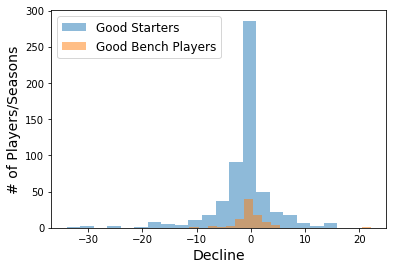

In [21]:
# Separate data into good starters and good bench
good_starters = df.loc[(df['WS/48']>=0.1) & (df['MP']/df['G']>25), 'Decline']
good_bench = df.loc[(df['WS/48']>=0.1) & (df['MP']/df['G']<=25), 'Decline']
ax = plt.hist(good_starters, bins=20, alpha=0.5, label='Good Starters')
ax = plt.hist(good_bench, bins=20, alpha=0.5, label='Good Bench Players')
plt.xlabel('Decline', fontsize=14)
plt.ylabel('# of Players/Seasons', fontsize=14)
plt.legend(fontsize=12)

In [22]:

ztest(good_starters, good_bench, 'Good Starters vs Good Bench')
print('The average improvement for good starters were', good_starters.mean())
print('The average improvement for good bench players were', good_bench.mean())

For Good Starters vs Good Bench, z = -2.1021422537247623, p = 0.035540816478413846
The average improvement for good starters were -1.2454720401108972
The average improvement for good bench players were -0.02759091708116552


The results for this are more interesting, there appears to be a significant impact on decline when a player is a starter vs a bench player. We can infer that there might need to be an additional target class identifier between what we define as bench players compared to starter players.

In [31]:
df[['WS','USG%']][df['Player']=='Kareem Abdul-Jabbar']

,WS,USG%
0,14.3,26.3
37,10.7,25.6
71,10.9,24.6
102,8.9,25.1
134,11.2,24.3
165,10.8,26.6
210,7.5,22.1
